In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
def compute_loss(y, tx, w):
    N = len(y)
    e = y - tx.dot(w.T)
    return 1/(2*N)*(e.T).dot(e)

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.solve((tx.T).dot(tx), (tx.T).dot(y))
    err = compute_loss(y,tx,w)
    return w, err
    

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w, err = least_squares(y, tx)
    print(w, err)

Test it here

In [5]:
test_your_least_squares()

[73.293922   13.47971243] 15.385887868829398


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [20]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    phi = np.array([[xn ** i for i in range(degree + 1)] for xn in x])
    # ***************************************************
    return phi

build_poly([i for i in range(5)], 3)

array([[ 1,  0,  0,  0],
       [ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27],
       [ 1,  4, 16, 64]])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [23]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
#         x_, mean_x, std_x = standardize(x)
        phi = build_poly(x, degree)
        # ***************************************************
        # ***************************************************
        w, err = least_squares(y, phi)
        rmse = np.sqrt(2 * compute_loss(y, phi, w))
        # ***************************************************

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248677


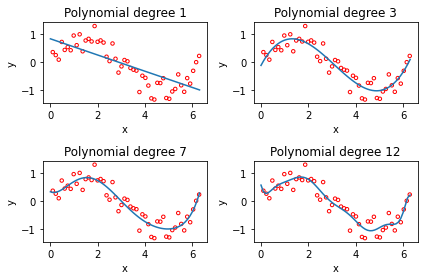

In [24]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [29]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # split the data based on the given ratio: TODO
    nb = int(x.shape[0] * ratio)
    c = list(zip(x, y))
    np.random.shuffle(c)
    x, y = zip(*c)
    
    # ***************************************************
    return x[:nb], y[:nb], x[nb:], y[nb:]

Then, test your `split_data` function below.

In [34]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    
    # split the data, and return train and test data:
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)

    # form train and test data with polynomial basis function:
    phi_tr = build_poly(x_tr, degree)
    phi_te = build_poly(x_te, degree)
    
    # calculate weight through least square:
    w, err = least_squares(y_tr, phi_tr)
    
    # calculate RMSE for train and test data,
    rmse_tr = np.sqrt(2 * compute_loss(y_tr, phi_tr, w))
    rmse_te = np.sqrt(2 * compute_loss(y_te, phi_te, w))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [35]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.548
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.254
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=4.651


# 3 Ridge Regression
Please fill in the function below.

In [65]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = tx.T.shape[0]
    X = (tx.T).dot(tx) + lambda_ * (2 * N)  * np.identity(N)
    Y = (tx.T).dot(y)
    w = np.linalg.solve(X, Y)
    err = np.sqrt(2 * compute_loss(y,tx,w))
    return w, err

In [66]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    # split the data, and return train and test data:
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function: TODO
    phi_tr = build_poly(x_tr, degree)
    phi_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression with a given lambda
        w, err = ridge_regression(y_tr, phi_tr, lambda_)
        
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, phi_tr, w)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, phi_te, w)))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.229, Testing RMSE=0.331
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.230, Testing RMSE=0.324
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.231, Testing RMSE=0.309
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.234, Testing RMSE=0.290
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.242, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.193, 

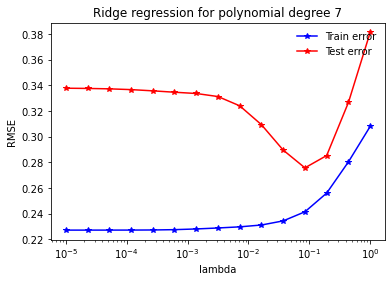

In [67]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)